#### Small Image Classification using Convolutional Neural Networks

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

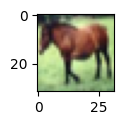

In [7]:
# Loading the Dataset and Preprocessing in same way as done in ANN project
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

# Image plotting function
def plot_images(index, data):
    plt.figure(figsize=(10,1))
    plt.imshow(data[index])
    
plot_images(7, x_train)

# scaling the x data
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# One Hot encoding of y data
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=len(classes),
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=len(classes),
)

In [8]:
# CNN Model
model = keras.models.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # flatten
    keras.layers.Flatten(),
    
    # dense
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

d:\Softwares\DL\conda\envs\dl_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.fit(x_train_scaled, y_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9611 - loss: 0.1110
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9646 - loss: 0.1005
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9640 - loss: 0.1070
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9646 - loss: 0.1035
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9696 - loss: 0.0864
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9673 - loss: 0.0967
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9667 - loss: 0.0992
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9675 - loss: 0.0977
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9720 - loss: 0.0812
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9722 - loss: 0.0836
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9703 - loss: 0.0875
Epoch 12/50
1563/1

In [11]:
model.evaluate(x_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6606 - loss: 4.0049


[4.004947185516357, 0.6606000065803528]

In [12]:
classes[np.argmax(model.predict(np.expand_dims(x_test_scaled[1], axis=0)))], classes[y_test[1][0]]
y_pred = np.argmax(model.predict(x_test_scaled), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


              precision    recall  f1-score   support

           0       0.77      0.60      0.68      1000
           1       0.81      0.77      0.79      1000
           2       0.61      0.50      0.55      1000
           3       0.45      0.51      0.48      1000
           4       0.61      0.58      0.59      1000
           5       0.53      0.60      0.56      1000
           6       0.73      0.74      0.73      1000
           7       0.69      0.73      0.71      1000
           8       0.80      0.77      0.78      1000
           9       0.67      0.82      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



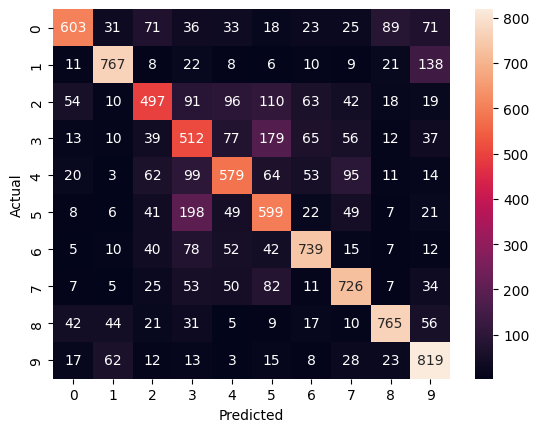

In [13]:
# Classification Report and Confusion Matrix
def print_report(y_test, y_pred):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
print_report(y_test, y_pred)

We have seen much better accuracy and performance using Convolutional Neural Networks (CNNs) for image classification tasks compared to Artificial Neural Networks (ANNs).

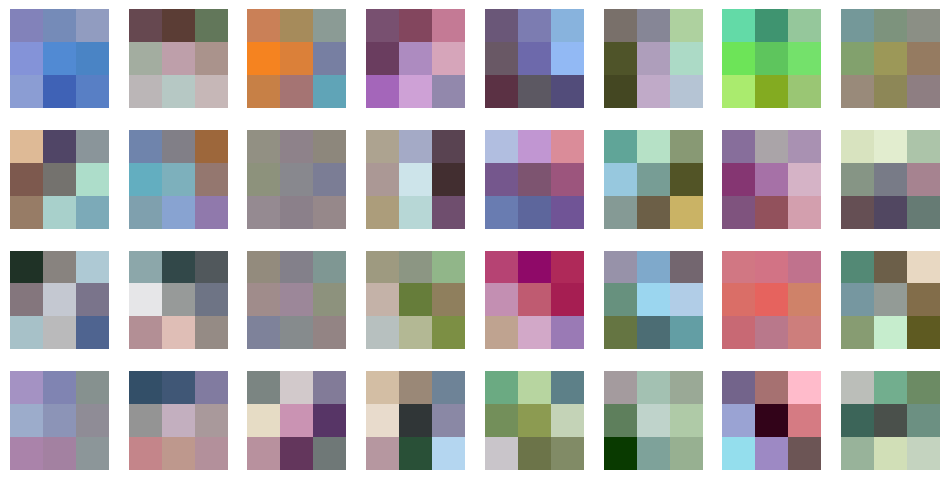

In [20]:
# Visualising filters created by CNN
layer = model.layers[0]
filters, biases = layer.get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters = filters.shape[3]
fig, ax = plt.subplots(4,8, figsize=(12,6))
for i in range(n_filters):
    row = i // 8
    col = i % 8
    ax[row, col].imshow(filters[:, :, :, i], cmap='gray')
    ax[row, col].axis('off')

Second layer filters shape: (3, 3, 32, 64)


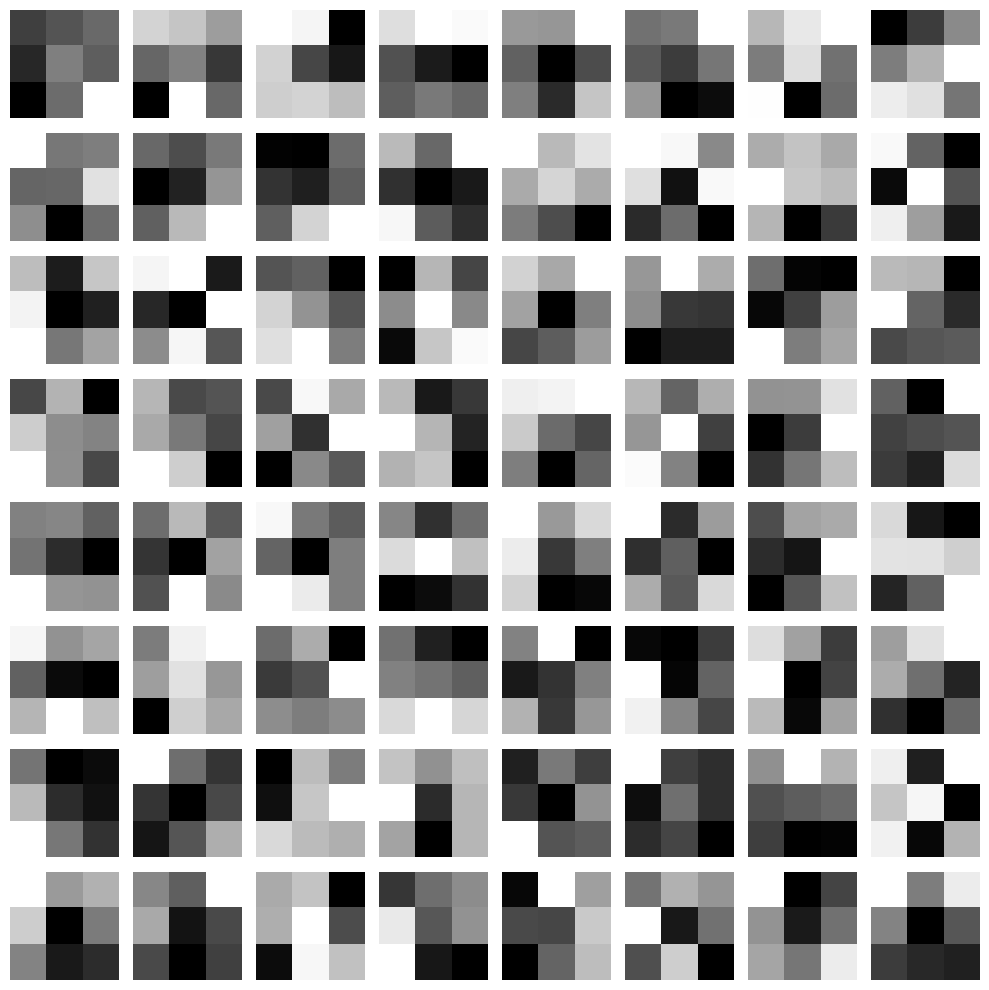

In [36]:
layer1 = model.layers[2]
filters1, biases1 = layer1.get_weights()
print(f"Second layer filters shape: {filters1.shape}")

# Average across input channels since we can't display (3,3,32) as image
filters1_avg = np.mean(filters1, axis=2)  # Shape becomes (3, 3, 64)
f1_min, f1_max = filters1_avg.min(), filters1_avg.max()
filters1_norm = (filters1_avg - f1_min) / (f1_max - f1_min)
n_filters1 = filters1_norm.shape[2]

fig1, ax1 = plt.subplots(8,8, figsize=(10,10))
for i in range(n_filters1):
    row = i // 8
    col = i % 8
    ax1[row, col].imshow(filters1_norm[:, :, i], cmap='gray')
    ax1[row, col].axis('off')
plt.tight_layout()
plt.show()